In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
# Nicer plotting
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,4)

# Movie example using write_beam

Here we insert write_beam elements into an existing lattice, run, save the beams to an h5 file, and plot using openPMD-beamphysics tools

In [3]:
from impact import Impact, template_dir
from distgen import Generator
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
IMPACT_IN = os.path.join(template_dir,'apex_gun/ImpactT.in')
DISTGEN_IN = os.path.join(template_dir,'apex_gun/distgen.yaml')
os.path.exists(IMPACT_IN)

True

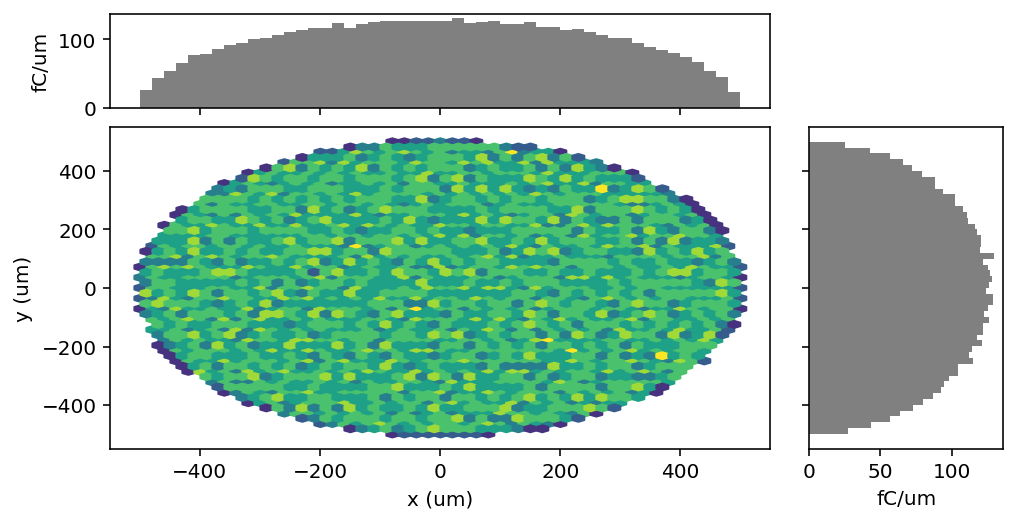

In [5]:
G = Generator(DISTGEN_IN)
G['n_particle'] = 10000
G.run()
P0 = G.particles
P0.plot('x', 'y')

In [6]:
# Make Impact object
I = Impact(IMPACT_IN, initial_particles = P0, verbose=True)


# Change some things
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 32
I.header['Dt'] = 1e-13

I.total_charge = P0['charge']
# Change stop location
I.stop = 0.1


Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmppuicedm9
Removed element: stop_1
Set stop to s = 0.1


In [7]:
# Make new write_beam elements and add them to the lattice.
from impact.lattice import new_write_beam

# Make a list of s
for s in np.linspace(0.001, 0.1, 98):
    ele = new_write_beam(s=s, ref_eles=I.lattice) # ref_eles will ensure that there are no naming conflicts
    I.add_ele(ele)

Inserted ele 'write_beam_71' before ele 'APEX_GUN' at index 2 out of 5
Inserted ele 'write_beam_72' before ele 'APEX_GUN' at index 3 out of 6
Inserted ele 'write_beam_73' before ele 'APEX_GUN' at index 4 out of 7
Inserted ele 'write_beam_74' before ele 'APEX_GUN' at index 5 out of 8
Inserted ele 'write_beam_75' before ele 'APEX_GUN' at index 6 out of 9
Inserted ele 'write_beam_76' before ele 'APEX_GUN' at index 7 out of 10
Inserted ele 'write_beam_77' before ele 'APEX_GUN' at index 8 out of 11
Inserted ele 'write_beam_78' before ele 'APEX_GUN' at index 9 out of 12
Inserted ele 'write_beam_79' before ele 'APEX_GUN' at index 10 out of 13
Inserted ele 'write_beam_80' before ele 'APEX_GUN' at index 11 out of 14
Inserted ele 'write_beam_81' before ele 'APEX_GUN' at index 12 out of 15
Inserted ele 'write_beam_82' before ele 'APEX_GUN' at index 13 out of 16
Inserted ele 'write_beam_83' before ele 'APEX_GUN' at index 14 out of 17
Inserted ele 'write_beam_84' before ele 'APEX_GUN' at index 15 o

In [9]:
I.timeout = 1000
I.run()

Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmppuicedm9
writing 10000 particles to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmppuicedm9/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 10000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 5.143470834582423e-11 according to initial particles
Cathode start: Replaced Tini with -2.563423239338539e-11 according to initial particles
Setting total charge to 1.0000000000000004e-10 C
Impact.run in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmppuicedm9 with:  /Users/chrisonian/Code/impact/bin/ImpactTexe_serial
Loaded fort 30 : Fourth root of the fourth moments of the beam distribution
Loaded fort 25 : RMS Y information
Loaded fort 24 : RMS X information
Loaded fort 26 : RMS Z information
Loaded fort 28 : Load balance and loss diagnostics
Loaded fort 29 : Cube root 

In [10]:
len(I.particles)

100

# Plot

In [11]:
from bokeh.plotting import  show, figure, output_notebook
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource
from bokeh import palettes, colors
pal = palettes.Viridis[256]
white=colors.named.white
pal = list(pal)
pal[0] = white # replace 0 with white
pal = tuple(pal)
output_notebook(verbose=False, hide_banner=True)
import os

In [12]:
# Prepare histogram function

PL = I.particles

ilist = []
for k in PL:
    if k.startswith('write_beam_'):
        ilist.append(int(k.strip('write_beam_')))

def bin_particles(i, key1='x', key2='y', bins=40):
    
    P = I.particles[f'write_beam_{i}']
    
    return np.histogram2d(P[key1], P[key2], weights=P.weight, bins=bins)
bin_particles(100)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.58658574e-03, -1.50828918e-03, -1.42999262e-03, -1.35169605e-03,
        -1.27339949e-03, -1.19510293e-03, -1.11680637e-03, -1.03850981e-03,
        -9.60213248e-04, -8.81916687e-04, -8.03620125e-04, -7.25323564e-04,
        -6.47027003e-04, -5.68730441e-04, -4.90433880e-04, -4.12137319e-04,
        -3.33840758e-04, -2.55544196e-04, -1.77247635e-04, -9.89510737e-05,
        -2.06545124e-05,  5.76420489e-05,  1.35938610e-04,  2.14235171e-04,
         2.92531733e-04,  3.70828294e-04,  4.49124855e-04,  5.27421417e-04,
         6.05717978e-04,  6.84014539e-04,  7.62311100e-04,  8.40607662e-04,
         9.18904223e-04,  9.97200784e-04,  1.07549735e-03,  1.15379391e-03,
         1.23209047e-03,  1.31038703e-03,  1.38868359e-03,  1.46698

In [13]:
# Prepare a datasource for Bokeh

def bin_bunch_datasource_h5(i, key1, key2,  bins=20, nice=True, liveOnly=True, liveStatus=1):
    H, xedges, yedges = bin_particles(i, key1, key2, bins=bins)
    xmin = min(xedges)
    xmax = max(xedges)
    ymin = min(yedges)
    ymax = max(yedges)
    
    
    #if nice:
    #    f1 = nice_phase_space_factor[component1]
    #    f2 = nice_phase_space_factor[component2]
    #    xlabel =  nice_phase_space_label[component1]
    #    ylabel =  nice_phase_space_label[component2]
    #    xmin *= f1
    #    xmax *= f1
    #    ymin *= f2
    #    ymax *= f2
    #else:
    #    xlabel = component1
    #    ylabel = component2
    
    # Form datasource
    dat = {'image':[H.transpose()], 'xmin':[xmin], 'ymin':[ymin], 'dw':[xmax-xmin], 'dh':[ymax-ymin]}
    dat['xmax'] = [xmax]
    dat['ymax'] = [ymax]
    
    ds = ColumnDataSource(data=dat)
    
    return ds
ds = bin_bunch_datasource_h5(100, 'x', 'y')

In [14]:

plot = figure(#x_range=[xmin,xmax], y_range=[ymin,ymax], 
              #    x_axis_label = xlabel,  y_axis_label = ylabel,
               plot_width=500, plot_height=500)
plot.image(image='image', x='xmin', y='ymin', dw='dw', dh='dh', source=ds,palette=pal)
show(plot)

# Interactive 

In [15]:
from bokeh.models.widgets import Slider
from bokeh import palettes, colors


In [23]:
# interactive
def myapp2(doc):
    
    bunches = ilist
    
    doc.bunchi = bunches[0]
    doc.component1 = 'z'
    doc.component2 = 'x' 
    doc.xlabel = doc.component1
    doc.ylabel = doc.component2

    doc.bins = 100
    
    #doc.range = FULLRANGE
    ds  = bin_bunch_datasource_h5(doc.bunchi, doc.component1, doc.component2,bins=doc.bins) 

    def refresh():
        ds.data  = dict(bin_bunch_datasource_h5(doc.bunchi, doc.component1, doc.component2,bins=doc.bins).data )
    
    # Default plot
  
    plot = figure(title='',  
                  x_axis_label = doc.xlabel, y_axis_label = doc.ylabel,
           plot_width=500, plot_height=500)    
    plot.image(image='image', x='xmin', y='ymin', dw='dw', dh='dh', source=ds, palette=pal)
    
    def slider_handler(attr, old, new):
        doc.bunchi =  bunches[new]
        refresh()

    slider = Slider(start=0, end=len(bunches)-1, value=0, step=1, title='x')             
    slider.on_change('value', slider_handler)

    # Add plot to end
    doc.add_root(column(slider, plot))
show(myapp2)# , notebook_url=remote_jupyter_proxy_url)

In [24]:
# If there are multiple 
import os
os.environ['BOKEH_ALLOW_WS_ORIGIN'] = 'localhost:8888'